In [2]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [3]:
# read dataset from external storage
df = pd.read_csv('D:/ML APPLIED/car_price_predictor-master/quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
# shape of dataset
df.shape

(892, 6)

In [5]:
# description of data
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [6]:
# information about the data of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


We can see in dataset information year, price and kms_driven is showing as object data type but in reality they are integer data type, so we will try to solve this problem

# Data Cleaning

In [7]:
new_df = df.copy()

In [8]:
# check unique values in year column
new_df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [9]:
# year column cleaning
new_df = new_df[new_df['year'].str.isnumeric()]
new_df['year'] = new_df['year'].astype(int)

In [10]:
# check unique values in year column after cleaning
new_df.year.unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [11]:
# check unique values in price column
new_df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [12]:
# price column cleaning
new_df = new_df[new_df['Price'] != 'Ask For Price']
new_df['Price'] = new_df['Price'].str.replace(',','')
new_df['Price'] = new_df['Price'].astype(int)

In [13]:
# check unique values in price column after cleaning
new_df.Price.unique()

array([  80000,  425000,  325000,  575000,  175000,  190000,  830000,
        250000,  182000,  315000,  415000,  320000, 1000000,  500000,
        350000,  160000,  310000,   75000,  100000,  290000,   95000,
        180000,  385000,  105000,  650000,  689999,  448000,  549000,
        501000,  489999,  280000,  349999,  284999,  345000,  499999,
        235000,  249999, 1475000,  395000,  220000,  170000,   85000,
        200000,  570000,  110000,  448999, 1891111,  159500,  344999,
        449999,  865000,  699000,  375000,  224999, 1200000,  195000,
        351000,  240000,   90000,  155000,  600000,  189500,  210000,
        390000,  135000, 1600000,  701000,  265000,  525000,  372000,
        635000,  550000,  485000,  329500,  251111,  569999,   69999,
        299999,  399999,  450000,  270000,  158400,  179000,  125000,
        299000,  150000,  275000,  285000,  340000,   70000,  289999,
        849999,  749999,  274999,  984999,  599999,  244999,  474999,
        245000,  169

In [64]:
# check unique data in kms driven column
new_df['kms_driven'].unique()

array(['45,000', '40', '28,000', '36,000', '41,000', '25,000', '24,530',
       '60,000', '30,000', '32,000', '48,660', '4,000', '16,934',
       '43,000', '35,550', '39,522', '39,000', '55,000', '72,000',
       '15,975', '70,000', '23,452', '35,522', '48,508', '15,487',
       '82,000', '20,000', '68,000', '38,000', '27,000', '33,000',
       '46,000', '16,000', '47,000', '35,000', '30,874', '15,000',
       '29,685', '1,30,000', '19,000', '54,000', '13,000', '38,200',
       '22,000', '50,000', '13,500', '3,600', '45,863', '60,500',
       '12,500', '18,000', '13,349', '29,000', '44,000', '42,000',
       '14,000', '49,000', '36,200', '51,000', '1,04,000', '33,333',
       '33,600', '5,600', '7,500', '26,000', '24,330', '65,480',
       '2,00,000', '59,000', '99,000', '2,800', '21,000', '11,000',
       '66,000', '3,000', '7,000', '38,500', '37,200', '43,200', '24,800',
       '45,872', '40,000', '11,400', '97,200', '52,000', '31,000',
       '1,75,430', '37,000', '65,000', '3,350',

In [14]:
# kms driven column cleaning
new_df = new_df[new_df['kms_driven'] != 'Petrol']
new_df['kms_driven'] = new_df['kms_driven'].str.split(' ').str[0]
new_df['kms_driven'] = new_df['kms_driven'].str.replace(',','').astype(int)

In [93]:
# check unique values in kms driven column after cleaning
new_df['kms_driven'].unique()

array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        26000,  24330,  65480, 200000,  59000,  99000,   2800,  21000,
        11000,  66000,   3000,   7000,  38500,  37200,  43200,  24800,
        45872,  40000,  11400,  97200,  52000,  31000, 175430,  37000,
        65000,   3350,  75000,  62000,  73000,   2200,  54870,  34580,
        97000,     60,  80200,   3200,      0,   5000,    588,  71200,
       175400,   9300,  56758,  10000,  56450,  56000,  32700,   9000,
      

In [15]:
# take only first three word for name column
new_df['name'] = new_df['name'].str.split(' ').str[:3].str.join(' ')

In [16]:
# check unique value in company column
new_df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [17]:
# check unique value in fuel type column
new_df.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [18]:
# fill null value by mode 
new_df['fuel_type'].fillna(new_df['fuel_type'].mode()[0], inplace=True)

In [19]:
# check unique value in fuel type column after cleaning
new_df.fuel_type.unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   817 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [21]:
new_df.reset_index(drop=True,inplace=True)

In [22]:
new_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


Now our dataframe is very clean

# Find and remove outliers

In [135]:
new_df.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In price and kms driven column has some outliers, so we will try to find and remove them by IQR

In [23]:
# create 25 and 75 percentile for price
percentile25 = new_df['Price'].quantile(0.25)
percentile75 = new_df['Price'].quantile(0.75)

In [24]:
# find IQR
iqr = percentile75 - percentile25

In [25]:
# find upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [26]:
# create new dataframe after remove outliers
new_df_2 = new_df[new_df['Price'] < upper_limit]
new_df_2.shape

(764, 6)

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

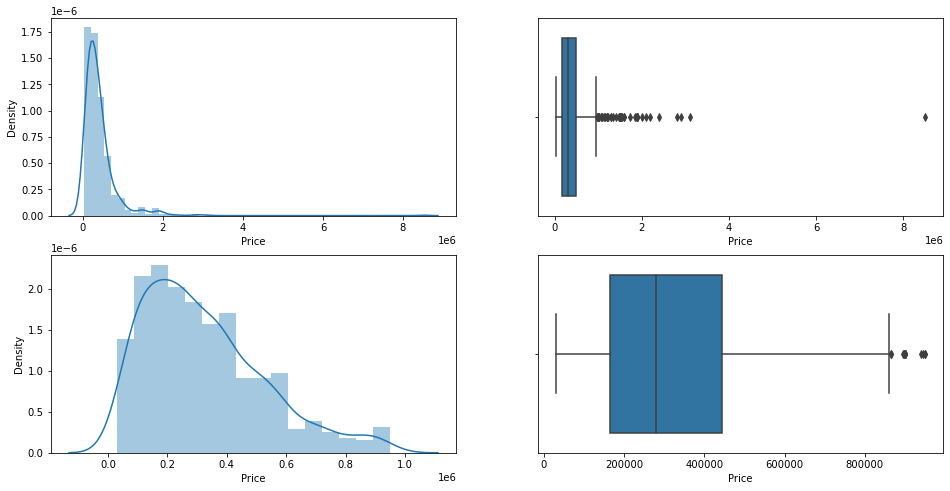

In [27]:
# compare plot after remove outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['Price'])
plt.subplot(2,2,2)
sns.boxplot(new_df['Price'])
plt.subplot(2,2,3)
sns.distplot(new_df_2['Price'])
plt.subplot(2,2,4)
sns.boxplot(new_df_2['Price'])
plt.show()

In [28]:
# capping outlier values for better prediction
new_df_caping = new_df.copy()
new_df_caping['Price'] = np.where(
    new_df_caping['Price'] > upper_limit,
    upper_limit,
    np.where(
        new_df_caping['Price'] < lower_limit,
        lower_limit,
        new_df_caping['Price']
    )
)

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

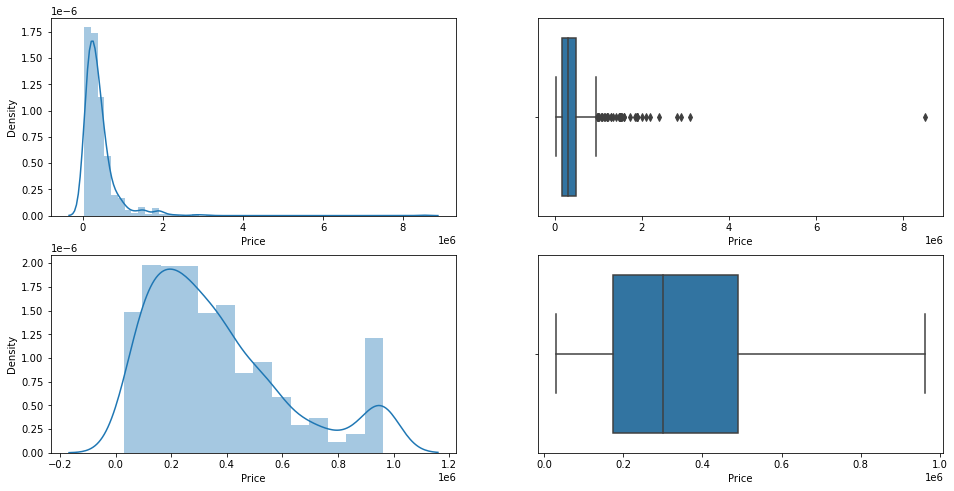

In [29]:
# compare plot after capping
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['Price'])
plt.subplot(2,2,2)
sns.boxplot(new_df['Price'])
plt.subplot(2,2,3)
sns.distplot(new_df_caping['Price'])
plt.subplot(2,2,4)
sns.boxplot(new_df_caping['Price'])
plt.show()

In [30]:
# create 25 and 75 percentile for kms driven
percentile25_kms = new_df_caping['kms_driven'].quantile(0.25)
percentile75_kms = new_df_caping['kms_driven'].quantile(0.75)

In [31]:
iqr_2 = percentile75_kms - percentile25_kms

In [32]:
# find upper and lower limit
upper_limit_2 = percentile75_kms + 1.5 * iqr_2
lower_limit_2 = percentile25_kms - 1.5 * iqr_2

In [33]:
# create new dataframe after remove outliers
new_df_3 = new_df_caping[new_df_caping['kms_driven'] < upper_limit]
new_df_3.shape

(817, 6)

In [34]:
# capping outlier values for better prediction
new_df_caping_2 = new_df_caping.copy()
new_df_caping_2['kms_driven'] = np.where(
    new_df_caping_2['kms_driven'] > upper_limit_2,
    upper_limit_2,
    np.where(
        new_df_caping_2['kms_driven'] < lower_limit_2,
        lower_limit_2,
        new_df_caping_2['kms_driven']
    )
)

C:\Users\mridh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mridh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

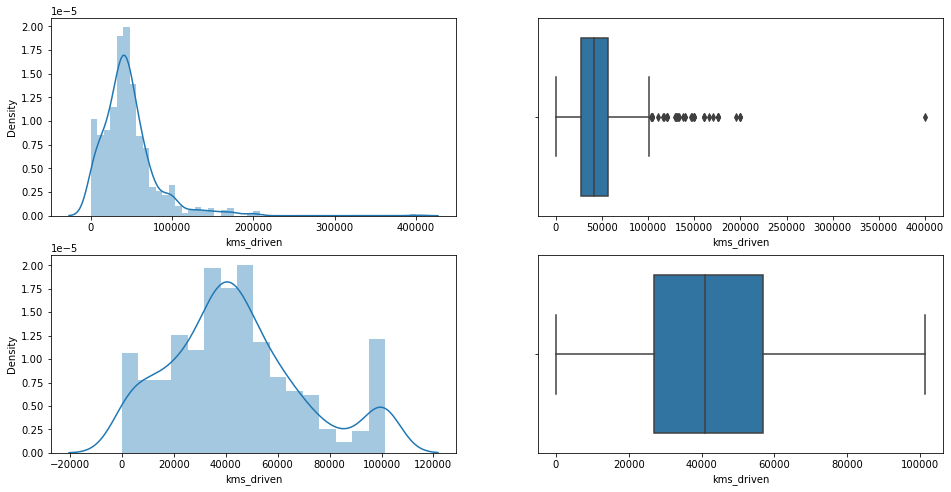

In [35]:
# compare plot after capping outliers
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df_caping['kms_driven'])
plt.subplot(2,2,2)
sns.boxplot(new_df_caping['kms_driven'])
plt.subplot(2,2,3)
sns.distplot(new_df_caping_2['kms_driven'])
plt.subplot(2,2,4)
sns.boxplot(new_df_caping_2['kms_driven'])
plt.show()

In [36]:
new_df_caping_2.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40.0,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000.0,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000.0,Diesel
4,Ford Figo,Ford,2012,175000.0,41000.0,Diesel


In [37]:
df_2 = new_df_caping_2.copy()
df_2.shape

(817, 6)

In [38]:
df_2.to_csv('clean_car_price.csv')

# Build Model For Prediction

In [185]:
df_2.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000.0,40.0,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000.0,28000.0,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000.0,36000.0,Diesel
4,Ford Figo,Ford,2012,175000.0,41000.0,Diesel


In [39]:
x = df_2.drop('Price', axis = 1)
y = df_2['Price']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state= 42)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [43]:
ohe.fit(x[['name','company','fuel_type']])

OneHotEncoder()

In [44]:
column_train = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['name','company','fuel_type']),
                                      remainder = 'passthrough')

In [45]:
pipe = make_pipeline(column_train,lr)

In [46]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [47]:
y_pred = pipe.predict(x_test)
y_pred

array([126535.85000928,  97644.64887029, 296607.35148923, 195820.64353533,
       259744.35828833, 400921.92575541, 142173.42706663, 859661.42373333,
        80361.32896772, 356055.47441756, 316431.57711589, 557491.74830285,
       863969.77248463, 114764.66766626, 399107.74712685, 156191.93881354,
       208757.16119374, 219171.51407571, 273492.81541794, 567942.50337806,
       442743.22064581,  93279.06682636, 517835.91402916, 170311.7534577 ,
       310217.37792293, 366149.52203054, 363019.08946029, 581412.0596098 ,
       287011.56300227, 635400.31743958, 261757.57339015, 900718.13857488,
       666865.65601805, 571400.57779614, 540565.58330079, 187036.55177514,
       553014.85066424,  17608.2173059 , 422151.70494232, 227298.73001777,
       183634.52175625, 560928.35715687, 540173.91523249, 663732.31147165,
       581412.0596098 , 227902.77858284, 261537.31524   , 175154.19042172,
       230821.54232603, 432145.84258705, 546383.8424535 , 321953.81377103,
       452282.7869676 , 3

In [48]:
r2_score(y_test,y_pred)

0.7270484461026647

In [205]:
import pickle

In [206]:
pickle.dump(pipe,open('LinearRegression.pkl','wb'))

In [51]:
# predict price on our own data
pipe.predict(pd.DataFrame([['BMW 3 Series', 'BMW', 2020, 1000,'Petrol']], columns = ['name','company','year','kms_driven','fuel_type']))

array([1116437.17636544])